# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Mike Abbinante

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from bs4 import BeautifulSoup
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import sent_tokenize
import pickle
import requests
import spacy
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mpabb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
url = "https://news.mit.edu/2023/ai-model-can-help-determine-where-patients-cancer-arose-0807"
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text

    with open("Article.html", "w", encoding="utf-8") as file:
        file.write(html_content)
        print("HTML content saved to 'webpage.html'")
else:
    print(f"Failed to retrieve content. Status code: {response.status_code}")

HTML content saved to 'webpage.html'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:
# Load NLTK's VADER
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Read HTML content
with open("Article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse using Beautiful Soup
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article
article_text = soup.get_text()

# Perform sentiment analysis
sentiment_scores = sid.polarity_scores(article_text)
polarity_score = sentiment_scores['compound']

# Count sentences in the article
sentences = sent_tokenize(article_text)
num_sentences = len(sentences)

# sentiment analysis results and sentence count
print("Sentiment Analysis:")
print(f"Polarity Score: {polarity_score:.2f}")

print("\nSentence Count:")
print(f"Number of Sentences: {num_sentences}")


Sentiment Analysis:
Polarity Score: 0.85

Sentence Count:
Number of Sentences: 56


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mpabb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [4]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Read HTML content from the file
with open("Article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML using Beautiful Soup
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article
article_text = soup.get_text()

# Process the article text using spaCy
doc = nlp(article_text)

# Calculate token frequencies
token_counter = Counter([token.text.lower() for token in doc if not token.is_punct and not token.is_space])

# Get the 5 most common tokens
most_common_tokens = token_counter.most_common(5)

# Print the common tokens and their frequencies
print("Most Common Tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency} occurrences")

Most Common Tokens:
the: 80 occurrences
of: 77 occurrences
to: 55 occurrences
mit: 46 occurrences
a: 40 occurrences


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [5]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Read HTML content from the file
with open("Article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML using Beautiful Soup
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article
article_text = soup.get_text()

# Process the article text using spaCy
doc = nlp(article_text)

# Calculate lemma frequencies
lemma_counter = Counter([token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space])

# Get the 5 most common lemmas
most_common_lemmas = lemma_counter.most_common(5)

# Print the common lemmas and their frequencies
print("Most Common Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency} occurrences")


Most Common Lemmas:
the: 80 occurrences
of: 77 occurrences
to: 55 occurrences
mit: 46 occurrences
cancer: 41 occurrences


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mpabb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


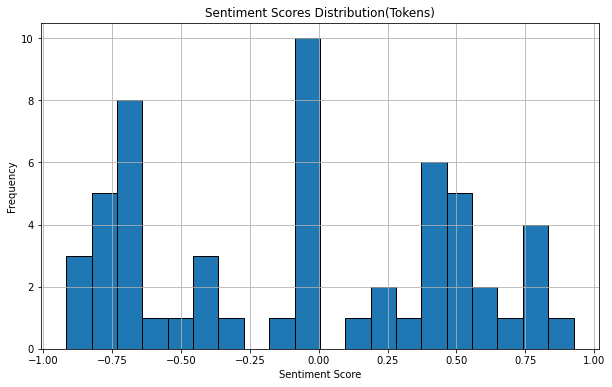

In [6]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Load NLTK's VADER SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Read HTML content from the file
with open("Article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML using Beautiful Soup
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article
article_text = soup.get_text()

# Tokenize the article text into sentences
sentences = sent_tokenize(article_text)

# Calculate sentiment scores for each sentence
sentence_scores = [sid.polarity_scores(sentence)["compound"] for sentence in sentences]

# Plot a histogram of the sentence scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, edgecolor="k")
plt.title("Sentiment Scores Distribution(Tokens)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
#The most common seem to be slightly below 0

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mpabb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


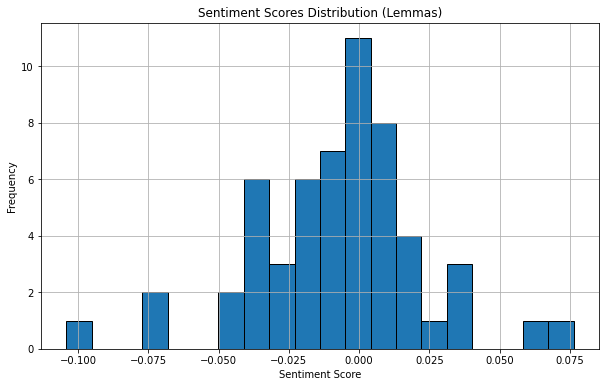

In [7]:
# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Load NLTK's VADER SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Read HTML content from the file
with open("Article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML using Beautiful Soup
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the article
article_text = soup.get_text()

# Tokenize the article text into sentences
sentences = sent_tokenize(article_text)

# Calculate sentiment scores for each sentence using lemmatized tokens
sentence_scores = []
for sentence in sentences:
    doc = nlp(sentence)
    lemma_scores = [sid.polarity_scores(token.lemma_)["compound"] for token in doc if not token.is_punct and not token.is_space]
    if lemma_scores:
        sentence_scores.append(sum(lemma_scores) / len(lemma_scores))

# Plot a histogram of the sentence scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, edgecolor="k")
plt.title("Sentiment Scores Distribution (Lemmas)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
#The most common range seems to be at 0.00 and the vast majority are between -.025 and 0.025.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.025
* Cutoff Score (lemmas): 0.02

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [22]:
# Your chosen cutoff score for tokens
cutoff_score_tokens = 0.03

# Create an empty list to store sentences for the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in sentences:
    # Process the sentence using spaCy
    doc = nlp(sent)
    
    # Calculate the average sentiment score for tokens in the sentence
    token_scores = [sid.polarity_scores(token.text)["compound"] for token in doc if not token.is_punct and not token.is_space]
    avg_token_score = sum(token_scores) / len(token_scores) if token_scores else 0.0
    
    # Add the sentence to the summary if its score is above the cutoff
    if avg_token_score > cutoff_score_tokens:
        summary_sentences.append(sent.strip())  # Use sent.strip() instead of sent.text.strip()

# Generate the summary text by joining the sentences
summary_text = ' '.join(summary_sentences)

# Print the summary
if summary_text:
    print(summary_text)
else:
    print("No sentences meet the cutoff criteria.")

A credit line must be used when reproducing images; if one is not provided 
    below, credit the images to "MIT." The researchers now hope to expand their model to include other types of data, such as pathology images and radiology images, to provide a more comprehensive prediction using multiple data modalities. This information “can help determine more effective treatment decisions for patients and caregivers,” writes Tran. Read full story →
            











3 Questions: Boosting concrete’s ability to serve as a natural “carbon sink”


              MIT CSHub postdoc Damian Stefaniuk unpacks new research to bolster concrete’s natural carbon sequestration potential by adding sodium bicarbonate in mixes. Read full story →
            













Freeman Hrabowski encourages students to “hold fast to dreams” and take time for laughter 


              In a visit to MIT, the educator and author led a lively and inspiring Q&A with students.


In [30]:
# Your chosen cutoff score for lemmas
cutoff_score_lemmas = 0.025

# Create an empty list to store sentences for the lemma-based summary
summary_sentences_lemmas = []

# Iterate through each sentence in the article
for sent in sentences:
    # Process the sentence using spaCy
    doc = nlp(sent)
    
    # Calculate the average sentiment score for lemmas in the sentence
    lemma_scores = [sid.polarity_scores(token.lemma_)["compound"] for token in doc if not token.is_punct and not token.is_space]
    avg_lemma_score = sum(lemma_scores) / len(lemma_scores) if lemma_scores else 0.0
    
    # Add the sentence to the lemma-based summary if its score is above the cutoff
    if avg_lemma_score > cutoff_score_lemmas:
        summary_sentences_lemmas.append(sent.strip())

# Generate the lemma-based summary text by joining the sentences
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the lemma-based summary
if summary_text_lemmas:
    print(summary_text_lemmas)
else:
    print("No sentences meet the cutoff criteria.")

A credit line must be used when reproducing images; if one is not provided 
    below, credit the images to "MIT." The researchers now hope to expand their model to include other types of data, such as pathology images and radiology images, to provide a more comprehensive prediction using multiple data modalities. This information “can help determine more effective treatment decisions for patients and caregivers,” writes Tran. Read full story →
            











3 Questions: Boosting concrete’s ability to serve as a natural “carbon sink”


              MIT CSHub postdoc Damian Stefaniuk unpacks new research to bolster concrete’s natural carbon sequestration potential by adding sodium bicarbonate in mixes. Read full story →
            













Freeman Hrabowski encourages students to “hold fast to dreams” and take time for laughter 


              In a visit to MIT, the educator and author led a lively and inspiring Q&A with students.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [25]:
# Your chosen cutoff score for tokens
cutoff_score_tokens = 0.025 

# Create an empty list to store sentences for the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in sentences:
    # Process the sentence using spaCy
    doc = nlp(sent)
    
    # Calculate the average sentiment score for tokens in the sentence
    token_scores = [sid.polarity_scores(token.text)["compound"] for token in doc if not token.is_punct and not token.is_space]
    avg_token_score = sum(token_scores) / len(token_scores) if token_scores else 0.0
    
    # Add the sentence to the summary if its score is above the cutoff
    if avg_token_score > cutoff_score_tokens:
        summary_sentences.append(sent.strip())  # Use sent.strip() instead of sent.text.strip()

# Generate the summary text by joining the sentences
summary_text = ' '.join(summary_sentences)

# Calculate sentiment score for the summary
summary_score = sid.polarity_scores(summary_text)["compound"]

# Print the summary's polarity score
print("Summary Polarity Score:", summary_score)

# Print the number of sentences in the summarized article
num_summary_sentences = len(summary_sentences)
print("Number of Sentences in Summarized Article:", num_summary_sentences)

Summary Polarity Score: 0.9899
Number of Sentences in Summarized Article: 6


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [27]:
# Your chosen cutoff score for lemmas
cutoff_score_lemmas = 0.2 
# Create an empty list to store sentences for the summary
summary_sentences_lemmas = []

# Iterate through each sentence in the article
for sent in sentences:
    # Process the sentence using spaCy
    doc = nlp(sent)
    
    # Calculate the average sentiment score for lemmas in the sentence
    lemma_scores = [sid.polarity_scores(token.lemma_)["compound"] for token in doc if not token.is_punct and not token.is_space]
    avg_lemma_score = sum(lemma_scores) / len(lemma_scores) if lemma_scores else 0.0
    
    # Debugging: Print the average lemma score for each sentence
    print("Average Lemma Score:", avg_lemma_score)
    
    # Add the sentence to the summary if its score is above the cutoff
    if avg_lemma_score > cutoff_score_lemmas:
        summary_sentences_lemmas.append(sent.strip())

# Generate the lemma-based summary text by joining the sentences
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Debugging: Print the summary sentences and its length
print("Summary Sentences:", summary_sentences_lemmas)
print("Number of Sentences in Summary:", len(summary_sentences_lemmas))

# Print the lemma-based summary
print(summary_text_lemmas)

Average Lemma Score: 0.005724561403508773
Average Lemma Score: -0.004831034482758621
Average Lemma Score: -0.010524657534246576
Average Lemma Score: 0.013492307692307692
Average Lemma Score: 0.0
Average Lemma Score: 0.03818
Average Lemma Score: -0.0192075
Average Lemma Score: -0.037504
Average Lemma Score: -0.07002499999999999
Average Lemma Score: -0.03255555555555555
Average Lemma Score: -0.003393749999999999
Average Lemma Score: 0.004293333333333336
Average Lemma Score: -0.009113793103448274
Average Lemma Score: -0.008316363636363636
Average Lemma Score: -0.022748275862068963
Average Lemma Score: -0.0382060606060606
Average Lemma Score: -0.10414999999999999
Average Lemma Score: -0.03283103448275862
Average Lemma Score: -0.005903225806451611
Average Lemma Score: -0.018809302325581395
Average Lemma Score: -0.004574999999999998
Average Lemma Score: -0.04123125
Average Lemma Score: -0.027487499999999998
Average Lemma Score: -0.04755454545454545
Average Lemma Score: -0.015908333333333333


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [35]:
# Your chosen cutoff score for lemmas
cutoff_score_lemmas = 0.02  # Replace with your actual cutoff score for lemmas

# Create an empty list to store sentences for the lemma-based summary
summary_sentences_lemmas = []

# Iterate through each sentence in the article
for sent in sentences:
    # Process the sentence using spaCy
    doc = nlp(sent)
    
    # Calculate the average sentiment score for lemmas in the sentence
    lemma_scores = [sid.polarity_scores(token.lemma_)["compound"] for token in doc if not token.is_punct and not token.is_space]
    avg_lemma_score = sum(lemma_scores) / len(lemma_scores) if lemma_scores else 0.0
    
    # Add the sentence to the lemma-based summary if its score is above the cutoff
    if avg_lemma_score > cutoff_score_lemmas:
        summary_sentences_lemmas.append(sent.strip())

# Generate the lemma-based summary text by joining the sentences
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Calculate sentiment score for the lemma-based summary
summary_score_lemmas = sid.polarity_scores(summary_text_lemmas)["compound"]

# Print the lemma-based summary's polarity score
print("Lemma-based Summary Polarity Score:", summary_score_lemmas)

# Print the number of sentences in the lemma-based summarized article
num_summary_sentences_lemmas = len(summary_sentences_lemmas)
print("Number of Sentences in Lemma-based Summarized Article:", num_summary_sentences_lemmas)

Lemma-based Summary Polarity Score: 0.9915
Number of Sentences in Lemma-based Summarized Article: 6


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

They are all fairly similar which makes sense. It is a mildly positive story about determining cancer by ai.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The original rating because it shows in a slightly positive light what this technology can do.